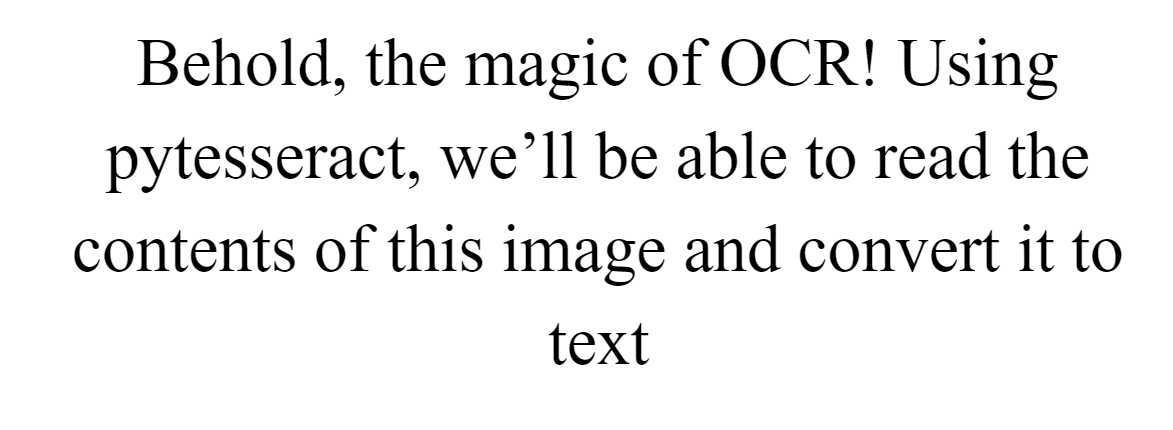

In [23]:
from PIL import Image
from IPython.display import display 

# tesseract path
pytesseract.pytesseract.tesseract_cmd = r"C:\OCR\tesseract.exe"

image = Image.open('readonly/text.png')
display(image)

In [17]:
import pytesseract
dir(pytesseract)

['Output',
 'TSVNotSupported',
 'TesseractError',
 'TesseractNotFoundError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'get_tesseract_version',
 'image_to_boxes',
 'image_to_data',
 'image_to_osd',
 'image_to_pdf_or_hocr',
 'image_to_string',
 'pytesseract',
 'run_and_get_output']

In [18]:
help(pytesseract.image_to_string)

Help on function image_to_string in module pytesseract.pytesseract:

image_to_string(image, lang=None, config='', nice=0, output_type='string', timeout=0)
    Returns the result of a Tesseract OCR run on the provided image to string



In [19]:
help(Image.Image.resize)

Help on function resize in module PIL.Image:

resize(self, size, resample=3, box=None, reducing_gap=None)
    Returns a resized copy of this image.
    
    :param size: The requested size in pixels, as a 2-tuple:
       (width, height).
    :param resample: An optional resampling filter.  This can be
       one of :py:attr:`PIL.Image.NEAREST`, :py:attr:`PIL.Image.BOX`,
       :py:attr:`PIL.Image.BILINEAR`, :py:attr:`PIL.Image.HAMMING`,
       :py:attr:`PIL.Image.BICUBIC` or :py:attr:`PIL.Image.LANCZOS`.
       Default filter is :py:attr:`PIL.Image.BICUBIC`.
       If the image has mode "1" or "P", it is
       always set to :py:attr:`PIL.Image.NEAREST`.
       See: :ref:`concept-filters`.
    :param box: An optional 4-tuple of floats providing
       the source image region to be scaled.
       The values must be within (0, 0, width, height) rectangle.
       If omitted or None, the entire source is used.
    :param reducing_gap: Apply optimization by resizing the image
       in two 

In [20]:
import inspect

src = inspect.getsource(pytesseract.image_to_string)
print(src)

def image_to_string(
    image, lang=None, config='', nice=0, output_type=Output.STRING, timeout=0,
):
    """
    Returns the result of a Tesseract OCR run on the provided image to string
    """
    args = [image, 'txt', lang, config, nice, timeout]

    return {
        Output.BYTES: lambda: run_and_get_output(*(args + [True])),
        Output.DICT: lambda: {'text': run_and_get_output(*args)},
        Output.STRING: lambda: run_and_get_output(*args),
    }[output_type]()



In [21]:
## to view the source code
pytesseract.image_to_string??

In [24]:
text = pytesseract.image_to_string(image)
print(text)

Behold, the magic of OCR! Using
pytesseract, we’ll be able to read the
contents of this image and convert it to
text


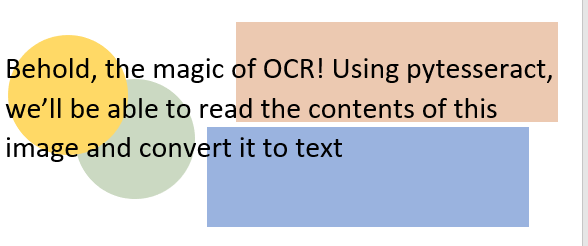

In [26]:
path = 'readonly/Noisy_OCR.png'
image = Image.open(path)
display(image)

In [28]:
text = pytesseract.image_to_string(image)
print(text)

e magic of OCR! Using pytesseract,
le to read the contents of this

 

d convert it to text


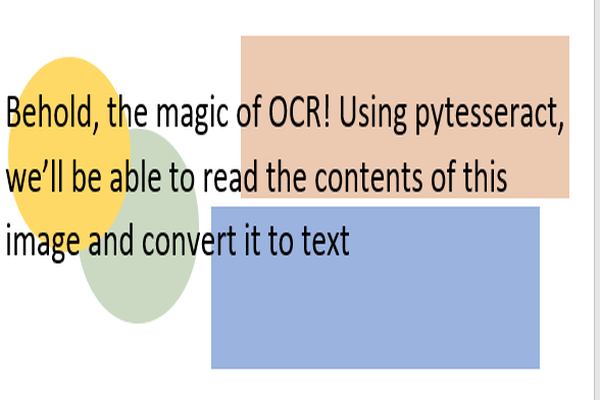

In [30]:
import PIL
# convert the image
basewidth = 600

img = image.resize((basewidth, 400), PIL.Image.ANTIALIAS)
img.save('resized_noise.png')
display(img)

In [31]:
text = pytesseract.image_to_string('resized_noise.png')

In [32]:
print(text)

e magic of OCR! Using pytesseract,
le to read the contents of this
im d convert it to text


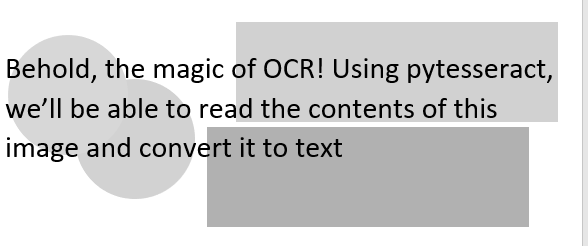

In [33]:
# convert to grayscale
img = Image.open(path)
img = img.convert('L')
img.save('gray_noise.png')
display(img)

In [34]:
text = pytesseract.image_to_string('gray_noise.png')
print(text)

Behold, the magic of OCR! Using pytesseract,
we'll be able to read the contents of this
image and convert it to text


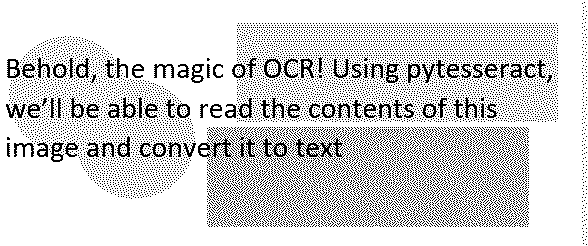

In [37]:
# other methods to extract the text from images
# binarization

img = Image.open(path).convert('1')  # convert to binary format
img.save('binary_noise.png')
display(img)

In [38]:
text = pytesseract.image_to_string('binary_noise.png')
print(text)

Behold, the magic of OCR! Using pytesseract,
we'll be able to read the contents of this


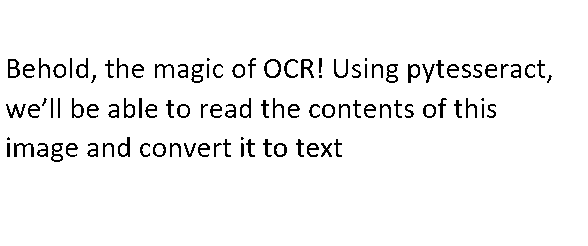

In [45]:
# binarize an image

def binarize(input_image, threshold):
    output = input_image.convert('L')
    
    for x in range(output.width):
        for y in range(output.height):
            if output.getpixel((x,y)) < threshold:
                output.putpixel((x,y), 0)
            else:
                output.putpixel((x,y), 255)
    return output

img = binarize(Image.open(path), 100)
display(img)